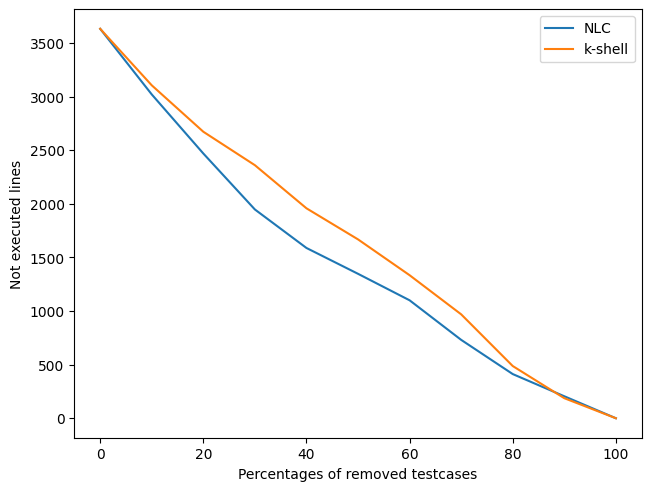

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import copy



# read the data file and convert it to a dictionary
# dictionary = {testcase ID (int): {"testcase": testcase name, "exec_line": list of executed lines}}
D = dict()
key_count = 0
previous_test_case = ''
with open('dataset/assertj-core1.txt') as f:
    for line in f:
        l_line = line.rstrip().split("\t")
        if previous_test_case != l_line[1]:
            previous_test_case = l_line[1]
            key_count += 1
        if key_count in D:
            D[key_count]["exec_line"].append(l_line[2]+l_line[3])
        else:
            D[key_count] = {"testcase": l_line[1], "exec_line":[l_line[2]+l_line[3]]}


# create a list of executed lines
S = set()
key_count = 0
with open('dataset/assertj-core1.txt') as f:
    for line in f:
        l_line = line.rstrip().split("\t")
        S.add(l_line[2]+l_line[3])

# analysis of NLC
NLC_S = copy.deepcopy(S)
NLC_list = []
x_axis = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] # top percentages of the test cases
y_axis_NLC = [] # number of not executed lines.

with open('assertj_nlc.txt') as f:
    for line in f:
        l_line = line.rstrip().split(" ")
        NLC_list.append((int(l_line[0]), float(l_line[1])))

# NLC_list.sort(key = lambda x: x[1], reverse=True)
NLC_list.sort(key = lambda x: x[1])

for x in x_axis:
    for i in range(0, int(len(NLC_list)*x/100)):
        exec_list = D[NLC_list[i][0]]["exec_line"]
        NLC_S = NLC_S-set(exec_list)
    
    y_axis_NLC.append(len(NLC_S))

# analysis of k-shell
k_shell_S = copy.deepcopy(S)
k_shell_list = []
y_axis_k_shell = []

with open('assertj_k_shell.txt') as f:
    for line in f:
        l_line = line.rstrip().split("\t")
        k_shell_list.append((int(l_line[0]), float(l_line[1])))

# k_shell_list.sort(key = lambda x: x[1], reverse=True)
k_shell_list.sort(key = lambda x: x[1])

for x in x_axis:
    for i in range(0, int(len(k_shell_list)*x/100)):
        exec_list = D[k_shell_list[i][0]]["exec_line"]
        k_shell_S = k_shell_S-set(exec_list)
    
    y_axis_k_shell.append(len(k_shell_S))


fig, ax = plt.subplots(layout='constrained')  # Create a figure containing a single axes.
ax.plot(x_axis, y_axis_NLC, label="NLC")
ax.plot(x_axis, y_axis_k_shell, label="k-shell")
ax.set_xlabel('Percentages of removed testcases')
ax.set_ylabel('Not executed lines')
ax.legend() 
plt.show()
        



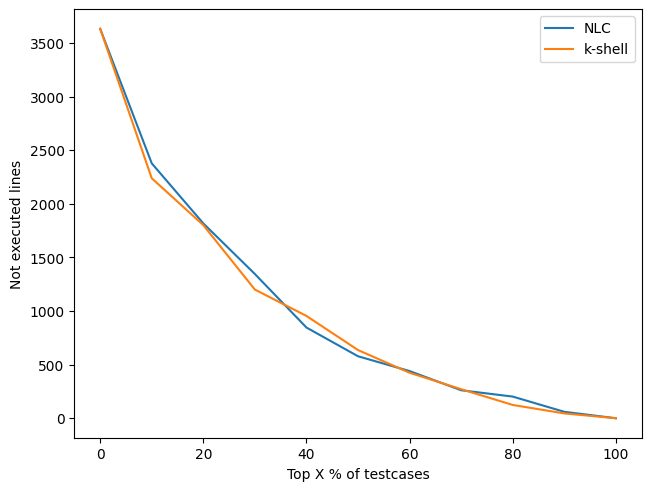